In [1]:
# %matplotlib agg
%run utils.ipynb

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors, ticker
import pandas as pd
import numpy as np
import scipy as sp
from astropy.table import Table
import astropy.units as u
import astropy.coordinates as coord
import arviz as az
import seaborn as sns

import kinesis as kn
import gapipes as gp

# This does not work with 'inline' backend: it will output latex
# compile error although PDF outputs etc will be saved correctly.
# I do not know why.
mystyledict.update({"text.usetex": True, "axes.unicode_minus": True})
plt.style.use(mystyledict)

In [66]:
out_full = pd.read_csv("../data/hyades_full.csv")
df = out_full.loc[out_full["in_dr2"] == True].copy()
leao = out_full.loc[out_full['in_leao']==True].copy()
b0 = np.median(df.g.icrs.cartesian.xyz.value, axis=1)

In [54]:
out_full.columns[out_full.columns.str.contains('leao')]

Index(['in_leao', 'ID_leao', 'RA_leao', 'Dec_leao', 'M/R_leao', 'e_M/R_leao',
       'GR_leao', 'C_leao', 'GR+C_leao', 'DRV_M02_leao', 'DRV_M02_GR_leao',
       'DRV_M02_GR+C_leao', 'DRV_G17_leao', 'DRV_G17_GR_leao',
       'DRV_G17_GR+C_leao', 'SpType_leao', 'Vmag_leao', '(B-V)_leao',
       'e_(B-V)_leao', 'RV_P98_leao', 'eRV_P98_leao', 'RV_M02_leao',
       'eRV_M02_leao', 'RV_G17_leao', 'eRV_G17_leao', 'RV_HARPS_leao',
       'eRV_HARPS_leao', 'FWHM_leao', 'S/N_leao', 'Flag_leao', '|r-rc|_leao',
       'e|r-rc|_leao', 'V_alpha_leao', 'eV_alpha_leao', 'V_delta_leao',
       'eV_delta_leao', 'CR_leao', 'RV_HARPS_GR+C_leao', 'RV_G17_CR_leao',
       'DRV_G17_GR+C+CR_leao'],
      dtype='object')

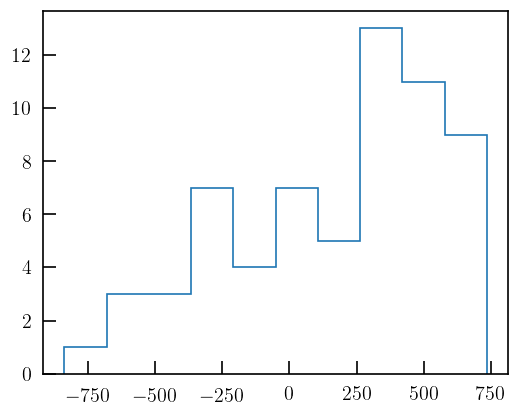

In [85]:
plt.hist(out_full['DRV_G17_leao'],histtype='step');

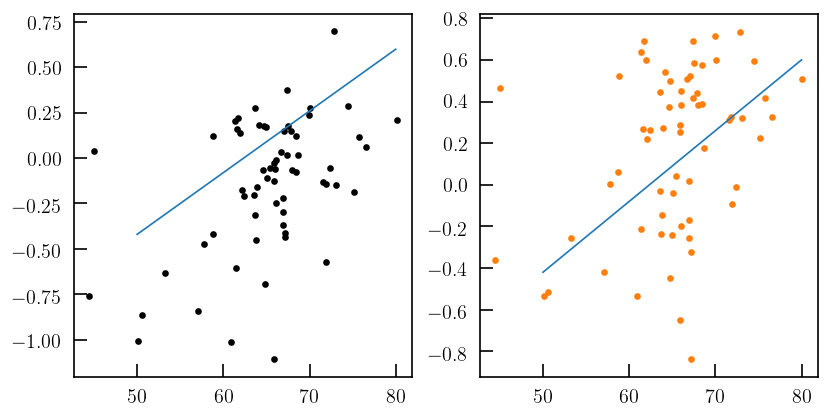

In [97]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
ax1.scatter(out_full['RA_leao'], out_full['DRV_G17_GR+C_leao']/1e3,s=9,c='k')
ax2.scatter(out_full['RA_leao'], out_full['DRV_G17_leao']/1e3,s=9,c='C1')

xs=np.linspace(50,80,64)
ax1.plot(xs, 0.0340*xs-2.12, )
ax2.plot(xs, 0.0340*xs-2.12, );

In [72]:
v0 = np.r_[-6.071, 45.685, 5.546]
Sigmav=0.
cl0 = kn.Cluster(v0=v0, sigmav=Sigmav, omegas=[0,0,0],b0=b0).sample_at(leao.g.icrs)
clrotx = kn.Cluster(v0=v0, sigmav=Sigmav, omegas=[40,0,0],b0=b0).sample_at(leao.g.icrs)
clroty = kn.Cluster(v0=v0, sigmav=Sigmav, omegas=[0,40,0],b0=b0).sample_at(leao.g.icrs)
clrotz = kn.Cluster(v0=v0, sigmav=Sigmav, omegas=[0,0,40],b0=b0).sample_at(leao.g.icrs)
clshearx = kn.Cluster(v0=v0, sigmav=Sigmav, b0=b0,
                      ws=[10,10,0,-20,15]).sample_at(leao.g.icrs)

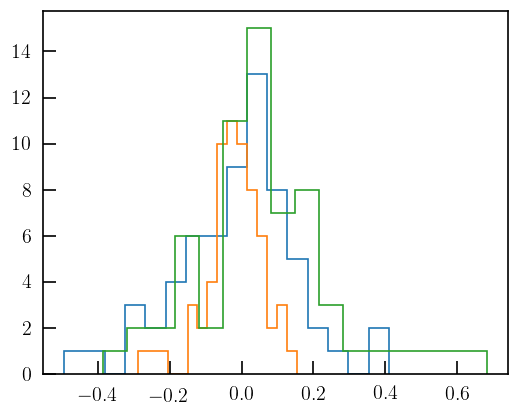

In [86]:
plt.hist(clrotx.members.truth["radial_velocity"] - cl0.members.truth["radial_velocity"],bins=16,histtype='step');
plt.hist(clroty.members.truth["radial_velocity"] - cl0.members.truth["radial_velocity"],bins=16,histtype='step');
plt.hist(clrotz.members.truth["radial_velocity"] - cl0.members.truth["radial_velocity"],bins=16,histtype='step');

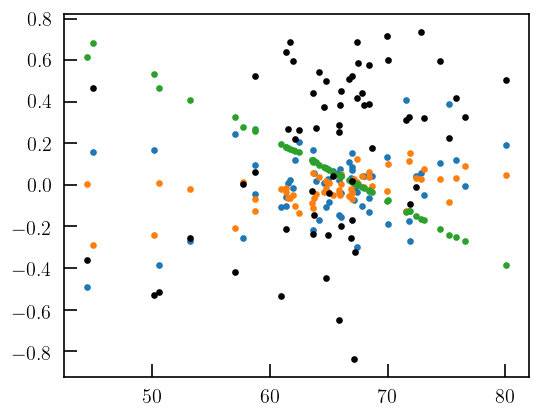

In [80]:
plt.scatter(
    clrotx.members.truth["ra"],
    clrotx.members.truth["radial_velocity"] - cl0.members.truth["radial_velocity"],
    s=9,
);
plt.scatter(
    clrotx.members.truth["ra"],
    clroty.members.truth["radial_velocity"] - cl0.members.truth["radial_velocity"],
    s=9,
);
plt.scatter(
    clrotx.members.truth["ra"],
    clrotz.members.truth["radial_velocity"] - cl0.members.truth["radial_velocity"],
    s=9,
);
plt.scatter(out_full['RA_leao'], out_full['DRV_G17_leao']/1e3,s=9,c='k')


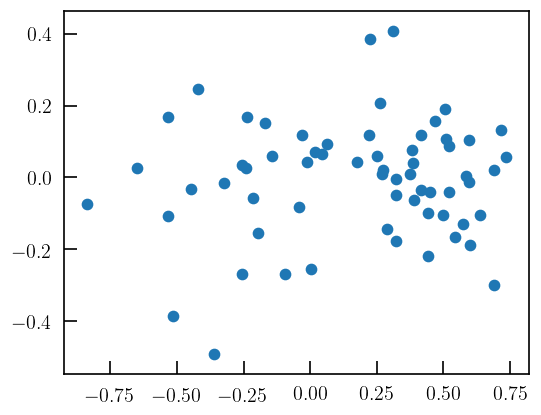

In [91]:
plt.scatter(
    leao['DRV_G17_leao']/1e3,
    clrotx.members.truth["radial_velocity"] - cl0.members.truth["radial_velocity"],);

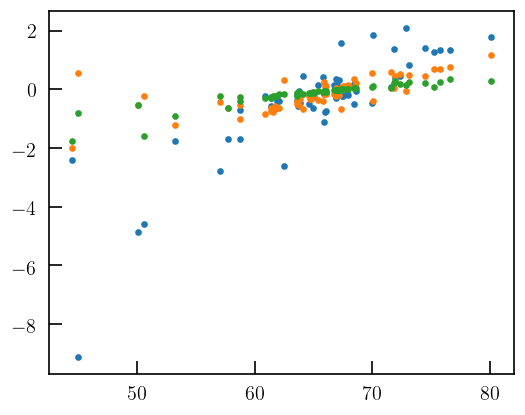

In [75]:
plt.scatter(
    clrotx.members.truth["ra"],
    clrotx.members.truth["pmdec"] - cl0.members.truth["pmdec"],
    s=9,
);
plt.scatter(
    clrotx.members.truth["ra"],
    clroty.members.truth["pmdec"] - cl0.members.truth["pmdec"],
    s=9,
);
plt.scatter(
    clrotx.members.truth["ra"],
    clrotz.members.truth["pmdec"] - cl0.members.truth["pmdec"],
    s=9,
);

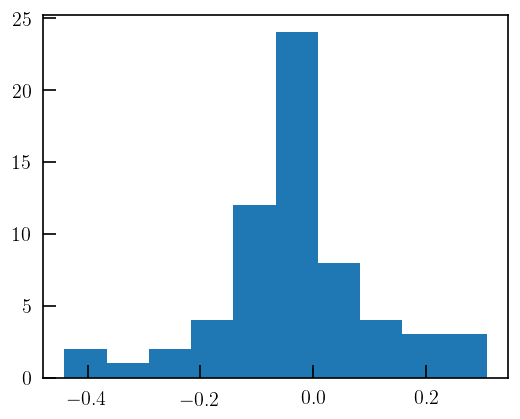

In [88]:
plt.hist(clshearx.members.truth["radial_velocity"] - cl0.members.truth["radial_velocity"],);

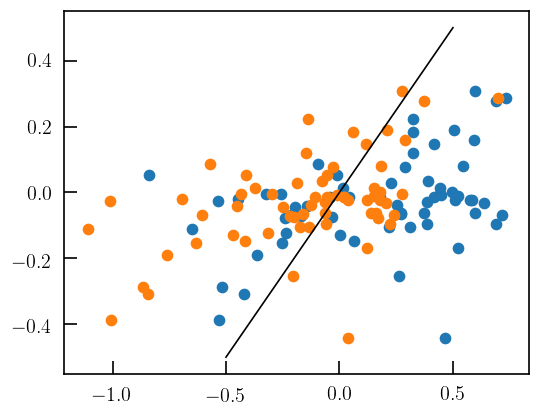

In [98]:
plt.scatter(
    leao['DRV_G17_leao']/1e3,
    clshearx.members.truth["radial_velocity"] - cl0.members.truth["radial_velocity"],);
plt.scatter(
    leao['DRV_G17_GR+C_leao']/1e3,
    clshearx.members.truth["radial_velocity"] - cl0.members.truth["radial_velocity"],);
xs=np.linspace(-0.5,0.5,64)
plt.plot(xs,xs,'k-');

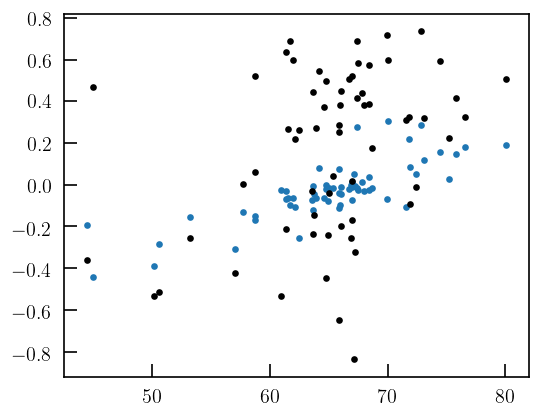

In [81]:
plt.scatter(
    clrotx.members.truth["ra"],
    clshearx.members.truth["radial_velocity"] - cl0.members.truth["radial_velocity"],
    s=9,
);
plt.scatter(out_full['RA_leao'], out_full['DRV_G17_leao']/1e3,s=9,c='k')

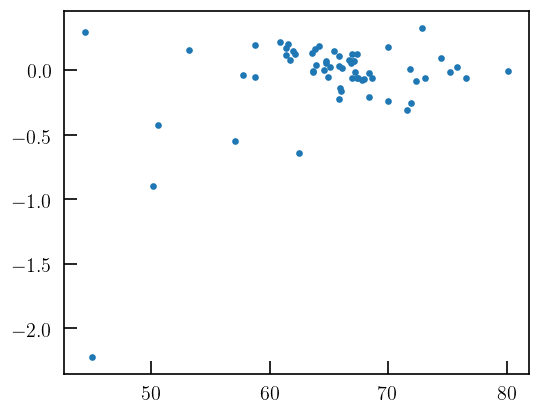

In [79]:
plt.scatter(
    clrotx.members.truth["ra"],
    clshearx.members.truth["pmdec"] - cl0.members.truth["pmdec"],
    s=9,
);